<a href="https://colab.research.google.com/github/NOTFORAWORK/RJD-hackaton-Liar-inc-2023/blob/main/RJD_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import *
'''Функция для суммы скобки с умножением из двух массивов'''
def summmnoj(mass1, mass2):
    if len(mass1) != len(mass2):
        return 0
    else:
        summ = 0
        for i in range(len(mass1)):
            summ += mass1[i]*mass2[i]
        return summ
"""Теорема пифагора"""
def pif(ch1, ch2):
    return sqrt(ch1**2 + ch2**2)

"""Интерфейс данных"""
'''gruzx, gruzy, gruzz, gruzmass - массивы в которых данные о всех грузах, формат длинна-ширина-высота-масса
vagon - массив с данными вагона формата длинна-ширина-высота-масса-длинна_базы-ширина_базы
количество груза беру из len(gruzx)
Ввод данных от 1 до последнего, если груз неустойчив то меняйте порядок
'''
vagon = [13300, 2890, 1310, 21, 13200, 2870, 9720]
def modcalc(gruzx, gruzy, gruzz, gruzmass, vagon = [13300, 2890, 1310, 21, 13200, 2870, 9720]):

    '''подсчёт центра тяжести груза'''
    ctgruzx = []
    ctgruzy = []
    ctgruzz = []

    for i in range(len(gruzx)):
        ctgruzx.append(gruzx[i]/2)
        ctgruzy.append(gruzy[i]/2)
        ctgruzz.append(gruzz[i]/2)

    '''количество брусков и добавочный размер в мм'''
    bruskov = len(gruzx) + 1
    lenbruskov = bruskov * 150

    """координата центра тяжести груза с торца"""
    coorctgruzx = [gruzx[0]+150]#150 это брусок

    for i in range(1, len(gruzx)):
        coorctgruzx.append((coorctgruzx[i-1] + ctgruzx[i-1] + 150 + ctgruzx[i]))

    """координата центра тяжести вагона"""
    coorctvagonx = vagon[0]/2
    coorctvagonz = vagon[2]/2
    print(ctgruzx, ctgruzy, ctgruzz, coorctgruzx)

    '''наветренная сторона'''
    vetst = []
    for i in range(len(gruzx)):
        vetst.append(gruzz[i]*gruzy[i])



    '''вери олд код'''
    """смещение центра тяжести всего груза"""
    CtMovingInside = (vagon[0] / 2) - (summmnoj(gruzmass, coorctgruzx) / sum(gruzmass))

    """Смещение центра тяжести вместе с вагоном"""
    CtMovingWithVagon = (vagon[0] / 2) - ((summmnoj(gruzmass, coorctgruzx) + (vagon[3] * coorctvagonx)) / (sum(gruzmass) + vagon[3]))

    """Высота центра тяжести в вагоне"""
    CtHighGruz = (summmnoj(gruzmass, gruzz) / sum(gruzmass))

    """Общая высота центра тяжести"""
    CtHighAll = (summmnoj(gruzmass, gruzz) + (vagon[3] * coorctvagonz)) / (sum(gruzmass) + vagon[3])

    """Наветренная поверхность"""
    NavetPoverh = sum(vetst) + 7#Захардкоденно т.к. нет понимания как считается состав

    '''Расчёт сил на груз i'''
    '''Открыть массив с итоговыми данными'''
    for i in range(len(gruzmass)):
        '''удельная продольная инерция на одну тонну, считается для вагона'''
        UdelProdInerFby1T = 1.2 - (sum(gruzmass[i], vagon[3]) * (1.2 - 0.97)/72)

        '''продольная инерционная сила'''
        ProdInerF = UdelProdInerFby1T * gruzmass[i]

        '''поперечная инерционная сила(на 1 тонну и общая на груз)'''
        UdelPopInerFby1T = 0.33 + (0.44/vagonbase[6]) * (vagon[0]/2 - coorctvagonx[i])
        PopInerF = UdelPopInerFby1T * gruzmass[i]

        """вертикальная инерционная сила(на 1 тонну и общая)"""
        UdelVertInerFby1T = 0,25 + 5*(10**(-6)) + 2.14/sum(gruzmass)
        VertInerF = UdelVertInerFby1T * gruzmass[i]

        """Ветровая нагрузка"""
        VetrNag = 50 * (10**(-3)) * vetst[i]

        '''Сила трения - продольная и поперечная'''
        FTrenProd = 0.5 * gruzmass[i]
        FTrenPop = 0.5 * gruzmass[i] * (1 - UdelVerInerFby1T)

        '''Креление должно выдержать продольно и поперечно'''
        KrepMustProd = ProdInerF - FTrenProd
        KrepMustPop = 1.25 * (PopInerF + VetrNag) - FTrenPop


        '''Устойчивость грузов'''
        '''Коэф запаса устойчивости от опрокидывания вдоль вагона'''
        CoefZapUstOprVdol = (pif(ctgruzz[i], ctgruzy[i])) / ((ctgruzz[i]-150) / UdelProdInerFby1T)

        """Коэф запаса устойчивости от опрокидывания поперёк вагона"""
        CoefZapUstOprPoperek = (gruzmass[i] * pif(ctgruzx[i], ctgruzz[i])) / ((PopInerF * (ctgruzz[i]-150)) + (VetrNag * (ctgruzz[i]-150)))

        if (CoefZapUstOprVdol < 1.25) or (CoefZapUstOprPoperek < 1.25):
            print('Груз 1 устойчив менее чем 1,25')
            break
        else:
            print(gruzx, gruzx, gruzx, gruzmass, ctgruzx, ctgruzy, ctgruzz)
            '''1, 2, 3 - размеры по длинне, ширине, высоте; 4 - масса; 5, 6, 7 - координаты центра длинны, ширины, высоты'''



In [ ]:
def plotBox (x,y, bias_x=0, bias_y=0, lp =0):

    x0 = x+bias_x
    y0 = y+bias_y

    x_centr = x0 - x/2
    y_centr = y0 - y/2


    xx = [bias_x, x0, x0, bias_x, bias_x]
    yy = [bias_y , bias_y ,y0, y0, bias_y]
    ax.plot(xx, yy, color="blue", linewidth=3)

    ax.plot(x_centr, y_centr,  marker="o", markersize=markersize, color="red")
    ax.text (x_centr-100, y_centr+100, f'ЦТгр {lp}')

In [ ]:
add_width_text = 200
add_height_text = 5


add_width  = 1000
add_height = 200


def plotArrow_W(x,y, bias_x=0, bias_y=0, direction = 1, y_top = 0, centr =0):
    head_width = 50
    add_width  = x/2
    # add_height = 100

    # add_width_text = 50
    # add_height_text = 50

    x0 = bias_x
    y0 = bias_y

    y1 = y0
    y2 = y0 + y

    if y_top ==0:
        y3 = y2 + (add_height)*direction
    else:
        y3 = y_top


    y4 = y3 - (add_height/2)*direction

    if direction== -1:
        y3 = y1 + (add_height)*direction
        y4 = y3 - (add_height/2)*direction


    x1 = x0
    x2 = x0+x

    x3 = x2 + add_width
    x4 = x3 - add_width/2



    xx = [x1, x1]
    yy = [y1 , y3]
    ax.plot(xx, yy, color="red")

    xx = [x2 , x2]
    yy = [y1 , y3]
    ax.plot(xx, yy, color="red")


    ax.arrow( x1 , y4,   x-head_width*2 , 0 , head_width = head_width,  color="black",  width=1)
    ax.arrow( x2 , y4,  -x+head_width*2 , 0 , head_width = head_width,  color="black",  width=1)
    ax.text (x1+(x/2)-30, y3+add_height_text, x)

def plotArrow_H(x,y, bias_x=0, bias_y=0, direction = 1, centr=1, x_top = 0, to_floor=0):


    head_width = 50
    add_width  = x/4
    add_height = y/4

    # add_width_text = 50
    # add_height_text = 50

    x0 = bias_x
    y0 = bias_y

    y1 = bias_y
    y2 = y+bias_y

    y3 = y2 + add_height
    y4 = y3 - add_height/2

    x1 = bias_x
    x2 = x1 + x





    if direction == 1:
        x3 = x1 - add_width
        x4 = x3 + add_width/2
    else:
        x3 = x1 + add_width
        x4 = x3 - add_width/2

    if to_floor == 1:
        y1 = 0
        x3 = x1 + add_width*3
        x4 = x3 - add_width/2
        y = y2


    xx = [x1, x3]
    yy = [y1 , y1]
    ax.plot(xx, yy, color="red")

    xx = [x1 , x3]
    yy = [y2 , y2]
    ax.plot(xx, yy, color="red")

    ax.arrow( x4 , y1,  0 , y - head_width*2, head_width = head_width,  color="black",  width=1)
    ax.arrow( x4 , y2,  0 , -y + head_width*2, head_width = head_width,  color="black",  width=1)
    ax.text (x3-30, y1+(y/2), y, rotation = 90)

In [ ]:
A = [
    [0, 0,0,0,1,0,0],
    [1, 3650,3320,1500,1,6670,6670],
    [2, 3870,2890,1020,1,4085,4085],
    [3, 1080,1580,390,1,395,395],
    [4, 4100,1720,1150,1,1865,1865],
]

A1 = [
    [0, 0,0,0,1,0,0],
    [1, 2650,2320,500,1,6670,6670],
    [2, 870,2890,1020,1,4085,4085],
    [3, 2080,1580,390,1,395,395],
    [4, 1100,1720,1150,1,1865,1865],
]

A2 = [
    [0, 0,0,0,1,0,0],
    [1, 2650,2320,1500,1,6670,6670],
    [2, 870,2890,2020,1,4085,4085],
    [3, 2080,1580,1390,1,395,395],
    [4, 1100,1720,2150,1,1865,1865],
]



B=[
13400,
2870,
21,
1310,
800,
9720,
]

y_top = 3500
y_top = 4500

x_space = 500
A=A2


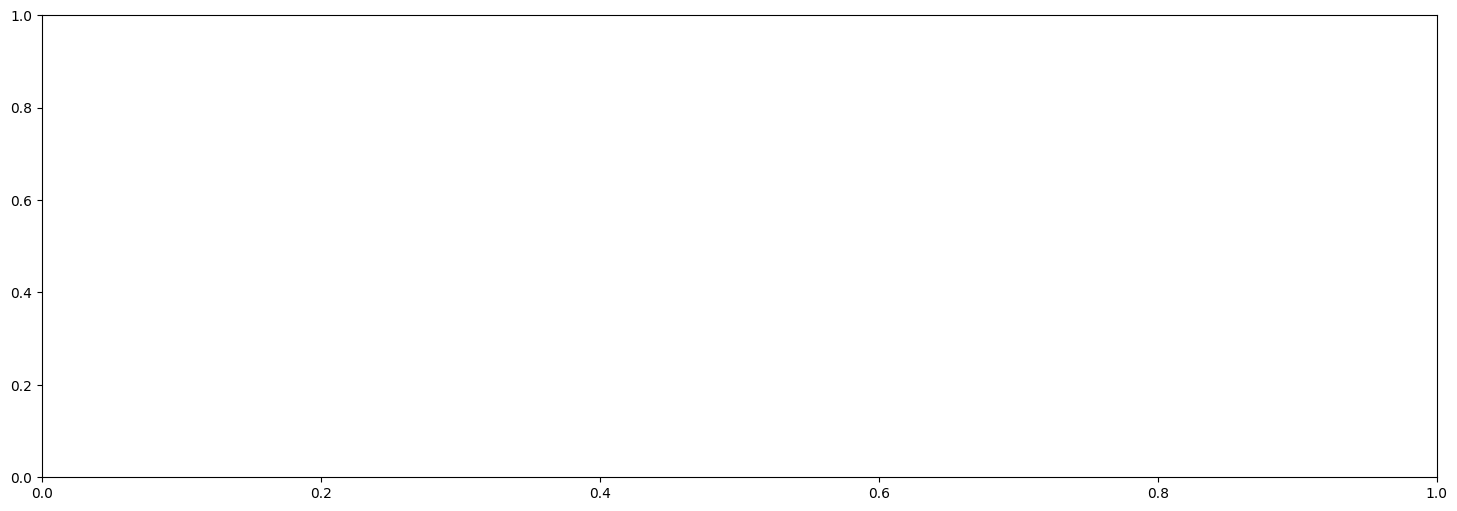

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
cm = 1/2.54  # centimeters in inches


# fig, ax = plt.subplots(figsize=(15*cm, 5*cm))

fig, ax = plt.subplots(figsize=(18, 6))
def f():
    # ax.plot(14000, 6000, color="black")
    markersize = 10

    nn = 1000
        # plotArrow(x_centr,y, bias_x=x_centr, bias_y=0)

    bias_x = 0
    bias_y = 0
    bias_y = 1310




    x = 13400
    y = -50
    plotBox (x,y,bias_x, bias_y )

    ax.plot([0,x ], [0, 0], color="black", linewidth=0)

    bias_x = 50

    direction = 1

    len_g0 = 0

    for arr in A:
        len_g0+=arr[1]

    len_g1 = (13340-len_g0-x_space*(len(A)-1))/2
    bias_x = len_g1



    for i in prioriter_list:
        x = A[i][1]
        y = A[i][3]
        plotBox (x,y,bias_x, bias_y, lp=i )

        plotArrow_W(x,y,bias_x, bias_y,  direction=1,  y_top=y_top )
        if x < 2000:
            direction=1
        else:
            direction=-1
        plotArrow_H(x,y,bias_x, bias_y,  direction = direction )

        x0 = x+bias_x
        y0 = y+bias_y
        x_centr = x - x/2
        y_centr = y - y/2

        plotArrow_W(x_centr, y_centr, bias_x, y_centr+bias_y, direction=1)
        plotArrow_H(x_centr, y_centr, x_centr+bias_x, bias_y, direction=-1)

        plotArrow_H(x_centr, y_centr, x_centr+bias_x, bias_y, direction=-1,to_floor =1)

        bias_x =bias_x + x + x_space

    plt.show()



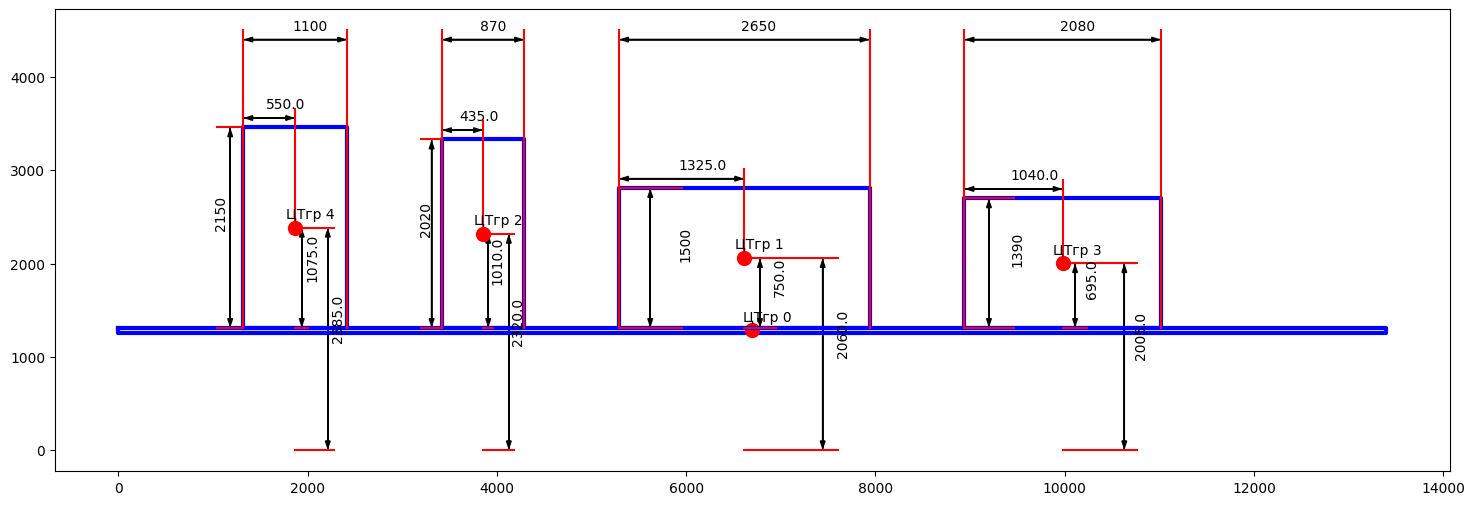

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
A = [[0, 0,0,0,1,0,0],
    [1, 3650,3320,1500,1,6670,6670],
    [2, 3870,2890,1020,1,4085,4085],
    [3, 1080,1580,390,1,395,395],
    [4, 4100,1720,1150,1,1865,1865],]
A1 = [[0, 0,0,0,1,0,0],
    [1, 2650,2320,500,1,6670,6670],
    [2, 870,2890,1020,1,4085,4085],
    [3, 2080,1580,390,1,395,395],
    [4, 1100,1720,1150,1,1865,1865],]
A2 = [[0, 0,0,0,1,0,0],
    [1, 2650,2320,1500,1,6670,6670],
    [2, 870,2890,2020,1,4085,4085],
    [3, 2080,1580,1390,1,395,395],
    [4, 1100,1720,2150,1,1865,1865],]
B=[13400,2870,21,1310,800,9720]
prioriter_list = [3, 1, 4, 2 ]
prioriter_list2 = [4, 2, 1, 3 ]
prioriter_list =prioriter_list2

y_top = 3500
y_top = 4500
x_space = 1000
# x_space = 500
# x_space = 100
A=A1
A=A2

f()